In [1]:
# 1. Data cleanig
# 2. EDA
# 3. Text Preprocessing
# 4. Model Buildiong
# 5. Evaluation
# 6. Improvement
# 7. website
# 8. Deployment

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
df.head()

,Unnamed: 0,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 6)

# 1.Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   v1          5572 non-null   object
 2   v2          5572 non-null   object
 3   Unnamed: 2  50 non-null     object
 4   Unnamed: 3  12 non-null     object
 5   Unnamed: 4  6 non-null      object
dtypes: int64(1), object(5)
memory usage: 261.3+ KB


In [7]:
#drop the last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 0'],inplace=True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#duplicate values
df.duplicated().sum()

403

In [13]:
# if there were duplicate values then to drop them
# >> df.drop_duplicates(keep='first')

In [14]:
#label encoding
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# 2.EDA- exploraty data analysis

In [15]:
df['target'].value_counts()
# ham-> 0
#spam-> 1

0    4825
1     747
Name: target, dtype: int64

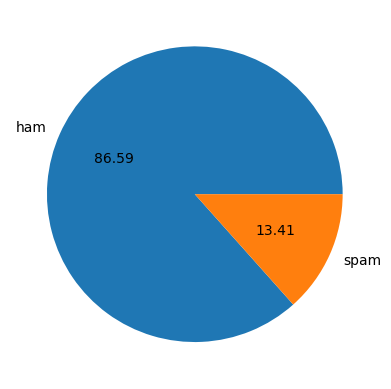

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
plt.show()

In [17]:
## analysis>>>> data is very much imbalanced

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Progyajyoti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
# number of characters in each row

In [21]:
df['text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    163
5568     38
5569     57
5570    125
5571     26
Name: text, Length: 5572, dtype: int64

In [22]:
df['num_characters']=df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
# number of words

In [25]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5572, dtype: int64

In [26]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5572, dtype: int64

In [28]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4825.000000,4825.000000,4825.000000
mean,71.132850,17.271917,1.808705
std,58.049623,13.988885,1.328227
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,747.000000,747.000000,747.000000
mean,139.759036,27.902276,3.028112
std,29.486731,6.871851,1.537036
min,13.000000,2.000000,1.000000
25%,134.000000,25.000000,2.000000
50%,151.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,8.000000


In [31]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

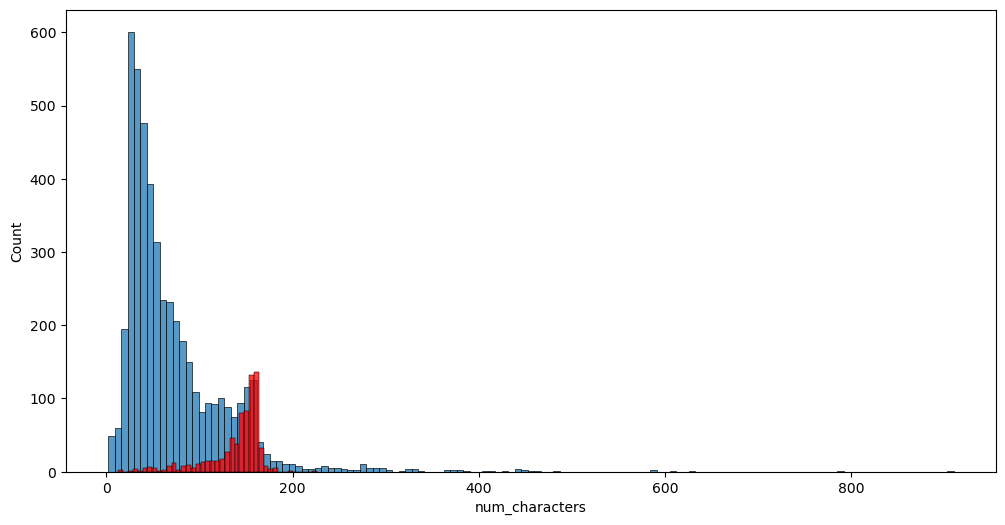

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


<AxesSubplot:xlabel='num_words', ylabel='Count'>

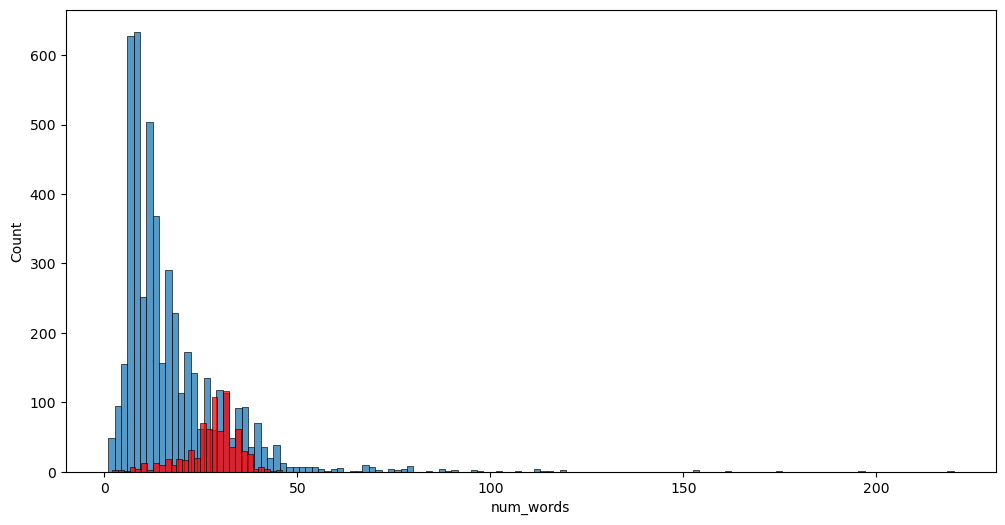

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

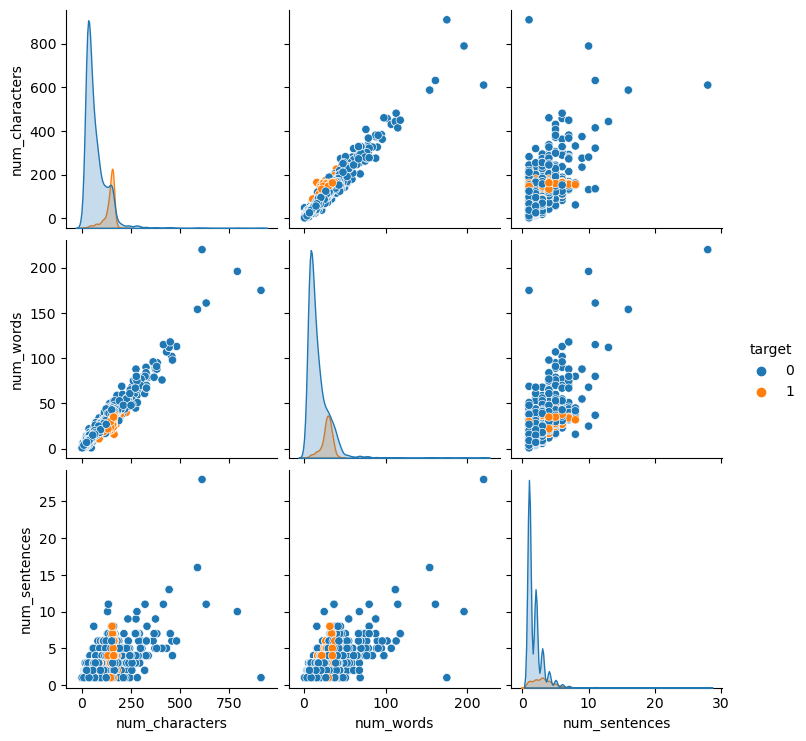

In [34]:
sns.pairplot(df,hue='target')

In [35]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.390763,0.263558,0.292598
num_characters,0.390763,1.000000,0.965624,0.646674
num_words,0.263558,0.965624,1.000000,0.689670
num_sentences,0.292598,0.646674,0.689670,1.000000


<AxesSubplot:>

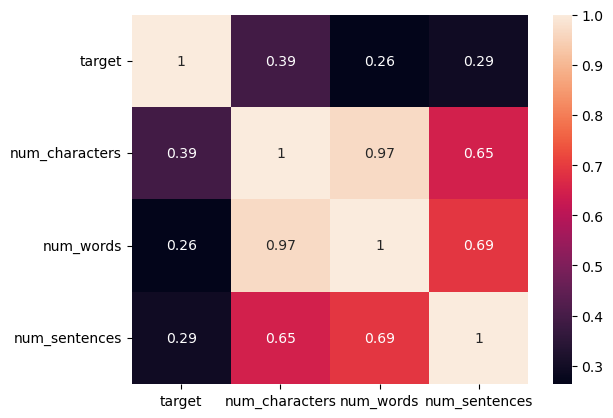

In [36]:
sns.heatmap(df.corr(),annot=True)

# Data preprocessing

In [37]:
#lower case
#tokenization
#removing special characters
#removing stop words and punctuation
#stemming

In [38]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [39]:
df['transformed_text']=df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
from wordcloud import WordCloud
wc=WordCloud(width=1000,height=1000,min_font_size=10,background_color='black')

In [42]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

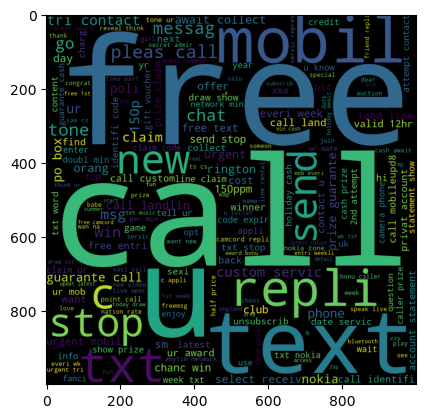

In [43]:
plt.imshow(spam_wc)

In [44]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

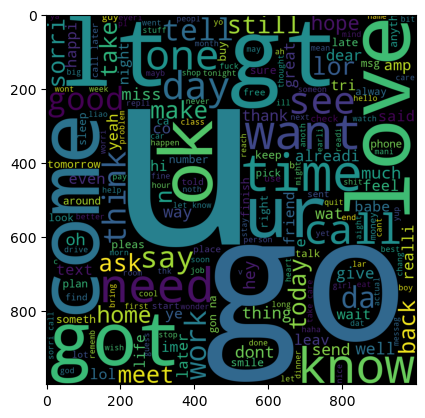

In [45]:
plt.imshow(ham_wc)

In [46]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

11487

In [48]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


C:\Users\Progyajyoti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


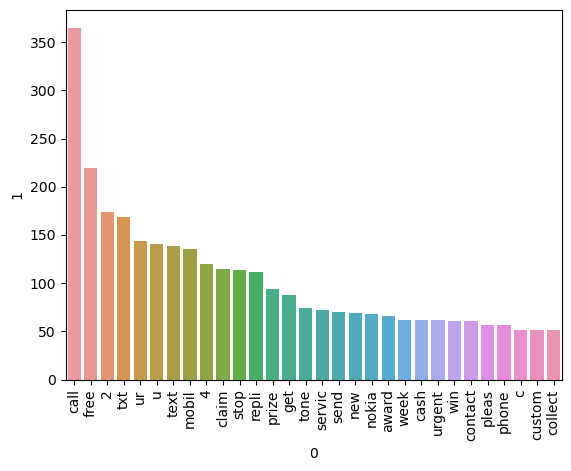

In [49]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [50]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
ham_corpus

['go',
 'jurong',
 'point',
 'crazi',
 'avail',
 'bugi',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amor',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'earli',
 'hor',
 'u',
 'c',
 'alreadi',
 'say',
 'nah',
 'think',
 'goe',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'mell',
 'oru',
 'minnaminungint',
 'nurungu',
 'vettam',
 'set',
 'callertun',
 'caller',
 'press',
 '9',
 'copi',
 'friend',
 'callertun',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymor',
 'tonight',
 'k',
 'cri',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promis',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promis',
 'wonder',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'rememb',
 '2',
 'spell',
 'name',
 'ye',
 'v',
 'naughti',
 'make',
 'v',
 'wet',
 'fine',
 'way',
 'u',
 

In [52]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


C:\Users\Progyajyoti\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


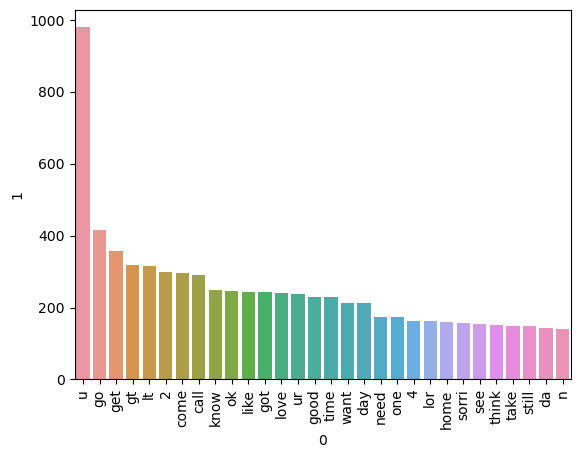

In [53]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# MODEL BUILDING

In [54]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
tfidf=TfidfVectorizer(max_features=4950)
cv=CountVectorizer()

In [56]:
X=tfidf.fit_transform(df["transformed_text"]).toarray()

In [57]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
y=df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [62]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8672645739910314
[[842 115]
 [ 33 125]]
0.5208333333333334


In [64]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9632286995515695
[[957   0]
 [ 41 117]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9721973094170404
[[955   2]
 [ 29 129]]
0.9847328244274809


In [66]:
#tfidf, multinomialNB
!pip install xgboost

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc=SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear', penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
abc=AdaBoostClassifier(n_estimators=50,random_state=2)
bc=BaggingClassifier(n_estimators=50,random_state=2)
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt=GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb=XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs={
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'Adaboost':abc,
    'Bgc':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    
    return accuracy,precision

In [71]:
accuracy_scores=[]
precision_scores=[]
names=[]

for name,clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print('For ',name)
    print('Accuracy ',current_accuracy)
    print('Precision ',current_precision)
    
    names.append(name)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    

For  SVC
Accuracy  0.9704035874439462
Precision  0.9844961240310077
For  KN
Accuracy  0.9022421524663677
Precision  1.0
For  NB
Accuracy  0.9632286995515695
Precision  1.0
For  DT
Accuracy  0.9255605381165919
Precision  0.8787878787878788
For  LR
Accuracy  0.9461883408071748
Precision  0.9537037037037037
For  RF
Accuracy  0.9614349775784753
Precision  1.0
For  Adaboost
Accuracy  0.9596412556053812
Precision  0.952
For  Bgc
Accuracy  0.9614349775784753
Precision  0.9323308270676691
For  ETC
Accuracy  0.9713004484304932
Precision  1.0
For  GBDT
Accuracy  0.9390134529147982
Precision  0.9411764705882353
For  xgb
Accuracy  0.9623318385650225
Precision  0.9833333333333333


In [72]:
performance_df=pd.DataFrame({'Algorithm':names,'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.902242,1.000000
2,NB,0.963229,1.000000
5,RF,0.961435,1.000000
8,ETC,0.971300,1.000000
0,SVC,0.970404,0.984496
10,xgb,0.962332,0.983333
4,LR,0.946188,0.953704
6,Adaboost,0.959641,0.952000
9,GBDT,0.939013,0.941176
7,Bgc,0.961435,0.932331


In [74]:
import pickle

In [75]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(etc,open('model.pkl','wb'))